**Implementing Apriori Algorithm**

The Apriori algorithm is one of the most popular algorithms in unsupervised machine learning, specifically under the category of association rule learning. It is designed to discover frequent patterns, associations, or relationships among items in large datasets. The name "Apriori" is derived from the Latin word a priori, meaning "from what comes before", which reflects the algorithm’s principle of using previously known frequent itemsets to generate larger ones. This method is widely used in market basket analysis, where businesses analyze purchasing patterns to identify items that are often bought together — for example, discovering that customers who buy bread and butter also tend to buy jam.

**How the Apriori Algorithm Works:-**
The Apriori algorithm works based on the “bottom-up” approach, where it begins by identifying individual items that frequently occur in the dataset and then extends them to larger and larger itemsets as long as those itemsets appear sufficiently often. It uses a key property called the Apriori Principle, which states that “all subsets of a frequent itemset must also be frequent.”

1.   Generate Candidate Itemsets: It scans the dataset to find all individual items and their support (frequency of occurrence).
2.   Apply Minimum Support Threshold: Only those items whose support value is greater than or equal to a predefined minimum support are considered frequent.
1.   Create Larger Itemsets: The frequent items are combined to form pairs, triplets, and so on, generating new candidate itemsets.
2.   Prune Infrequent Itemsets: Itemsets that do not meet the minimum support threshold are removed.
1.   Generate Association Rules: Finally, from the frequent itemsets, rules are generated that show relationships between items. Each rule is evaluated using three key metrics








In [4]:
# Import all the liberiies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from mlxtend.frequent_patterns import apriori, association_rules


In [5]:
# Load Wine dataset
wine = load_wine()

# Create DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = [wine.target_names[i] for i in wine.target]

# Show basic info
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [6]:
# Dataset Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [7]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


/tmp/ipython-input-1342823943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


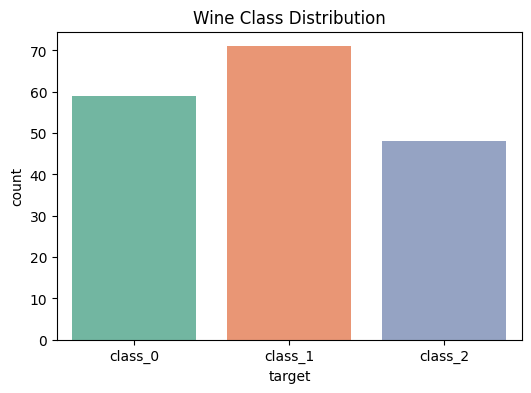

In [8]:
# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Wine Class Distribution')
plt.show()


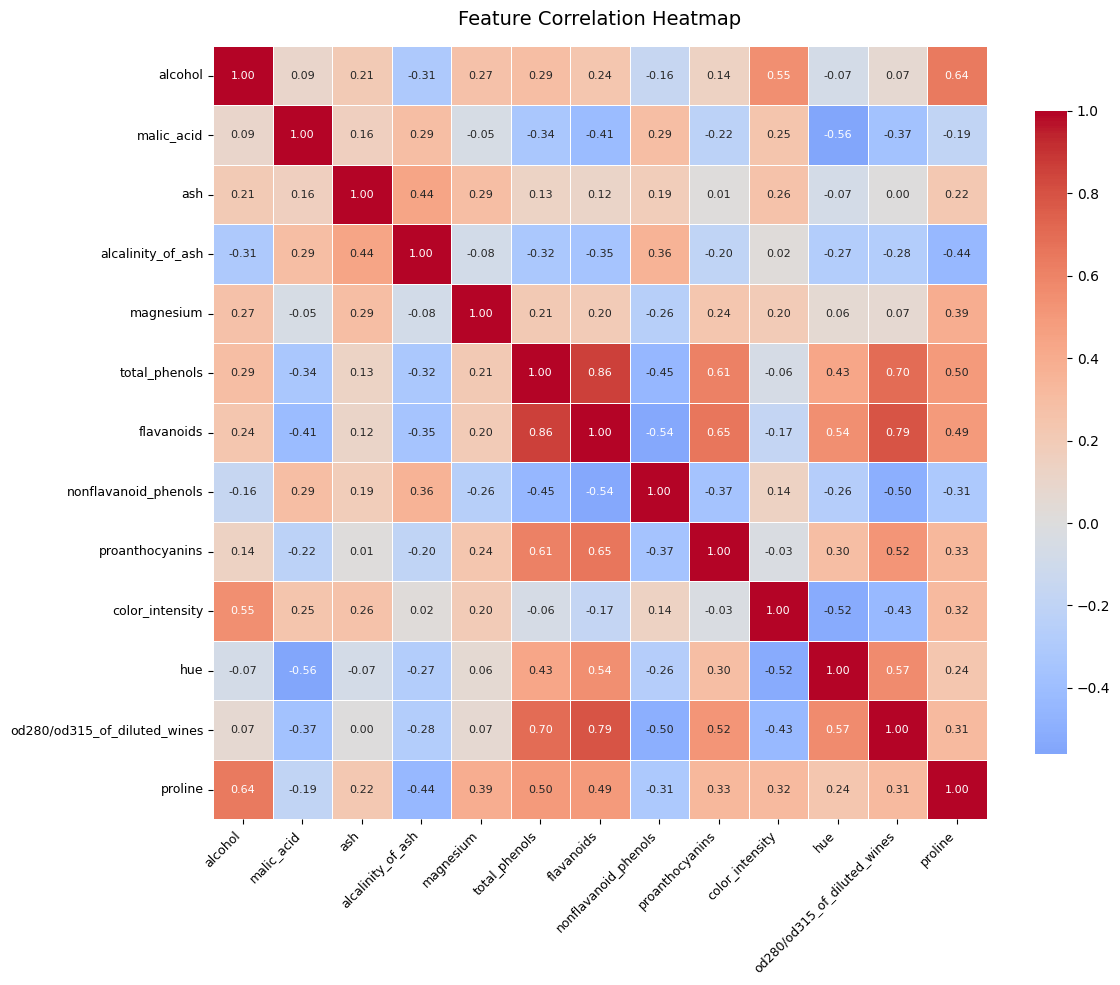

In [13]:
# Feature Correlation Heatmap
plt.figure(figsize=(12, 10))
# Compute correlation matrix (excluding target)
corr = df.drop('target', axis=1).corr()
sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}
)

plt.title('Feature Correlation Heatmap', fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


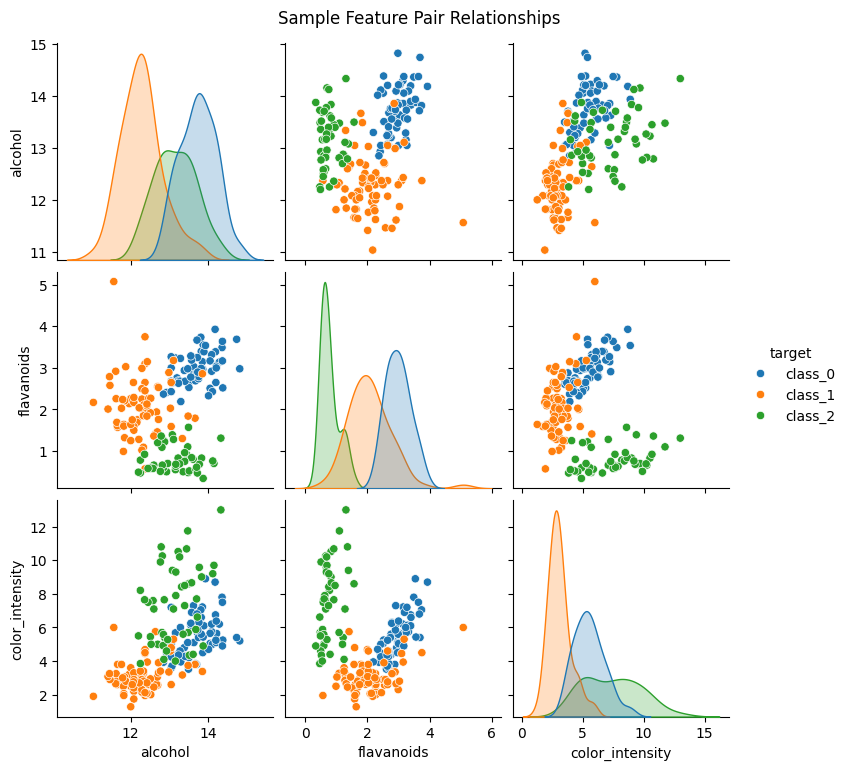

In [14]:
# Pairplot Visualization
sns.pairplot(df, hue='target', vars=['alcohol', 'flavanoids', 'color_intensity'])
plt.suptitle('Sample Feature Pair Relationships', y=1.02)
plt.show()


In [15]:
# Data Preprocessing
# Define labels
labels = ['Low', 'Medium', 'High']
# Discretize all numeric columns
for col in df.columns[:-1]:
    df[col] = pd.cut(df[col], bins=3, labels=labels)

df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,High,Low,Medium,Low,Medium,Medium,Medium,Low,Medium,Medium,Medium,High,Medium,class_0
1,Medium,Low,Medium,Low,Low,Medium,Medium,Low,Low,Low,Medium,High,Medium,class_0
2,Medium,Low,High,Medium,Medium,Medium,Medium,Low,High,Medium,Medium,High,Medium,class_0
3,High,Low,Medium,Low,Medium,High,Medium,Low,Medium,Medium,Low,High,High,class_0
4,Medium,Medium,High,Medium,Medium,Medium,Medium,Medium,Medium,Low,Medium,Medium,Low,class_0


In [16]:
# One-hot encode all categorical features
encoded_df = pd.get_dummies(df)
print("Encoded Data Shape:", encoded_df.shape)
encoded_df.head()


Encoded Data Shape: (178, 42)


,alcohol_Low,alcohol_Medium,alcohol_High,malic_acid_Low,malic_acid_Medium,malic_acid_High,ash_Low,ash_Medium,ash_High,alcalinity_of_ash_Low,...,hue_High,od280/od315_of_diluted_wines_Low,od280/od315_of_diluted_wines_Medium,od280/od315_of_diluted_wines_High,proline_Low,proline_Medium,proline_High,target_class_0,target_class_1,target_class_2
0,False,False,True,True,False,False,False,True,False,True,...,False,False,False,True,False,True,False,True,False,False
1,False,True,False,True,False,False,False,True,False,True,...,False,False,False,True,False,True,False,True,False,False
2,False,True,False,True,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
3,False,False,True,True,False,False,False,True,False,True,...,False,False,False,True,False,False,True,True,False,False
4,False,True,False,False,True,False,False,False,True,False,...,False,False,True,False,True,False,False,True,False,False


In [21]:
# Apply Apriori Algorithm
frequent_itemsets = apriori(encoded_df, min_support=0.2, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

print("Frequent Itemsets (Top 10):")
display(frequent_itemsets.head(10))


Frequent Itemsets (Top 10):


,support,itemsets
5,0.702247,(ash_Medium)
8,0.640449,(alcalinity_of_ash_Medium)
3,0.640449,(malic_acid_Low)
26,0.601124,(proline_Low)
22,0.595506,(hue_Medium)
19,0.578652,(color_intensity_Low)
9,0.561798,(magnesium_Low)
14,0.505618,(flavanoids_Medium)
65,0.500000,"(malic_acid_Low, hue_Medium)"
75,0.488764,"(alcalinity_of_ash_Medium, ash_Medium)"


In [22]:
# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules.sort_values(by=['lift'], ascending=False)

# Clean display
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

print("Top 10 Association Rules:")
display(rules[['antecedents','consequents','support','confidence','lift']].head(10))


Top 10 Association Rules:


,antecedents,consequents,support,confidence,lift
550,"hue_Low, od280/od315_of_diluted_wines_Low",target_class_2,0.235955,0.954545,3.539773
555,target_class_2,"hue_Low, od280/od315_of_diluted_wines_Low",0.235955,0.875000,3.539773
488,"target_class_2, flavanoids_Low","hue_Low, od280/od315_of_diluted_wines_Low",0.235955,0.875000,3.539773
492,target_class_2,"hue_Low, flavanoids_Low, od280/od315_of_dilute...",0.235955,0.875000,3.539773
480,"hue_Low, flavanoids_Low, od280/od315_of_dilute...",target_class_2,0.235955,0.954545,3.539773
485,"hue_Low, od280/od315_of_diluted_wines_Low","target_class_2, flavanoids_Low",0.235955,0.954545,3.539773
1065,"hue_Low, flavanoids_Low","target_class_2, total_phenols_Low",0.207865,0.755102,3.446363
1062,"target_class_2, total_phenols_Low","hue_Low, flavanoids_Low",0.207865,0.948718,3.446363
1082,target_class_2,"hue_Low, flavanoids_Low, proanthocyanins_Low",0.207865,0.770833,3.430208
1075,"hue_Low, flavanoids_Low, proanthocyanins_Low",target_class_2,0.207865,0.925000,3.430208


In [23]:
# Rule Interpretation
for i, row in rules.head(10).iterrows():
    print(f"Rule {i+1}: IF [{row['antecedents']}] THEN [{row['consequents']}], "
          f"support={row['support']:.2f}, confidence={row['confidence']:.2f}, lift={row['lift']:.2f}")


Rule 551: IF [hue_Low, od280/od315_of_diluted_wines_Low] THEN [target_class_2], support=0.24, confidence=0.95, lift=3.54
Rule 556: IF [target_class_2] THEN [hue_Low, od280/od315_of_diluted_wines_Low], support=0.24, confidence=0.88, lift=3.54
Rule 489: IF [target_class_2, flavanoids_Low] THEN [hue_Low, od280/od315_of_diluted_wines_Low], support=0.24, confidence=0.88, lift=3.54
Rule 493: IF [target_class_2] THEN [hue_Low, flavanoids_Low, od280/od315_of_diluted_wines_Low], support=0.24, confidence=0.88, lift=3.54
Rule 481: IF [hue_Low, flavanoids_Low, od280/od315_of_diluted_wines_Low] THEN [target_class_2], support=0.24, confidence=0.95, lift=3.54
Rule 486: IF [hue_Low, od280/od315_of_diluted_wines_Low] THEN [target_class_2, flavanoids_Low], support=0.24, confidence=0.95, lift=3.54
Rule 1066: IF [hue_Low, flavanoids_Low] THEN [target_class_2, total_phenols_Low], support=0.21, confidence=0.76, lift=3.45
Rule 1063: IF [target_class_2, total_phenols_Low] THEN [hue_Low, flavanoids_Low], suppo

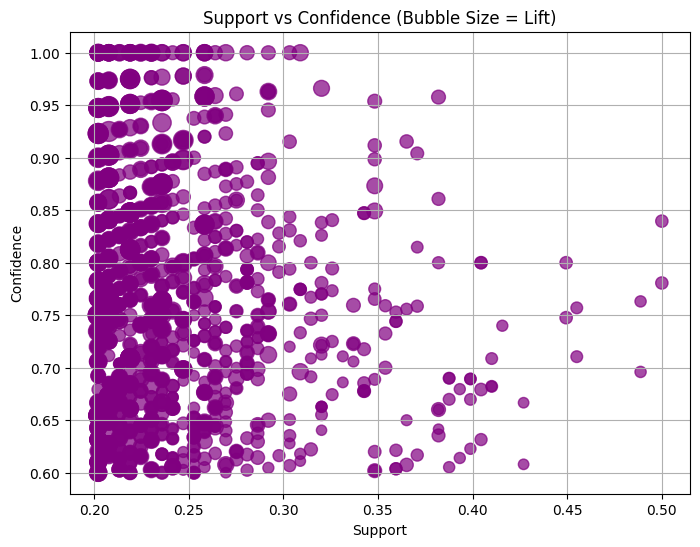

In [24]:
# Support vs Confidence
plt.figure(figsize=(8,6))
plt.scatter(rules['support'], rules['confidence'], s=rules['lift']*60, alpha=0.7, color='purple')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence (Bubble Size = Lift)')
plt.grid(True)
plt.show()


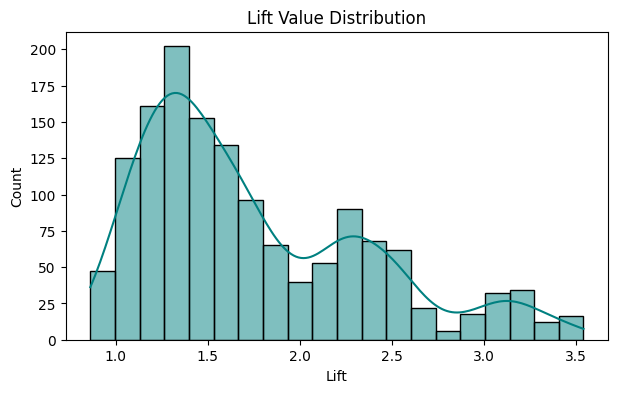

In [25]:
# Lift Distribution
plt.figure(figsize=(7,4))
sns.histplot(rules['lift'], bins=20, kde=True, color='teal')
plt.title('Lift Value Distribution')
plt.xlabel('Lift')
plt.show()


In [26]:
# Filter Strong Rules
strong_rules = rules[(rules['lift'] > 1.5) & (rules['confidence'] > 0.7)]
print("Strong Association Rules (Lift > 1.5, Confidence > 0.7):")
display(strong_rules[['antecedents','consequents','support','confidence','lift']])


Strong Association Rules (Lift > 1.5, Confidence > 0.7):


,antecedents,consequents,support,confidence,lift
550,"hue_Low, od280/od315_of_diluted_wines_Low",target_class_2,0.235955,0.954545,3.539773
555,target_class_2,"hue_Low, od280/od315_of_diluted_wines_Low",0.235955,0.875000,3.539773
488,"target_class_2, flavanoids_Low","hue_Low, od280/od315_of_diluted_wines_Low",0.235955,0.875000,3.539773
492,target_class_2,"hue_Low, flavanoids_Low, od280/od315_of_dilute...",0.235955,0.875000,3.539773
480,"hue_Low, flavanoids_Low, od280/od315_of_dilute...",target_class_2,0.235955,0.954545,3.539773
...,...,...,...,...,...
1402,"total_phenols_Low, proline_Low","alcalinity_of_ash_Medium, ash_Medium",0.202247,0.734694,1.503167
947,"color_intensity_Low, proanthocyanins_Medium",flavanoids_Medium,0.213483,0.760000,1.503111
909,"hue_Medium, color_intensity_Low, total_phenols...",flavanoids_Medium,0.213483,0.760000,1.503111
603,"malic_acid_Low, hue_Medium, proanthocyanins_Me...",flavanoids_Medium,0.230337,0.759259,1.501646


In [27]:
#Save Rules to CSV
strong_rules.to_csv("wine_apriori_rules.csv", index=False)
print("Rules saved as wine_apriori_rules.csv")


Rules saved as wine_apriori_rules.csv


**Conclusion:-**

The Apriori algorithm effectively discovered strong associations within the Wine dataset, revealing how certain chemical features like low hue and low flavanoids are highly related to specific wine classes. By using support, confidence, and lift, it provided clear, interpretable patterns that enhance understanding of the data.

Although it can be computationally heavy for large datasets, Apriori remains a powerful and easy-to-understand tool for uncovering hidden relationships and driving data-driven insights.